<a href="https://colab.research.google.com/github/navyavemavarapu/Task_6/blob/main/Assignment_7_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Discrimination**

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.                                           
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.                                                          
Year. Number of years in current rank.                                 
Degree. Highest degree. 1 for doctorate, 0 for master's.                  
YSdeg. Years since highest degree was earned.                                 
Salary. Salary/year in dollars.                                                                                                           
**Tasks**                                                                        
Find the linear regression equation for this data using columns 1-5 to column 6.

Find the selection of columns with the best  R2  score.                        
Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [ ]:
df.shape

(52, 6)

# Data cleaning

In [ ]:
df.isnull().sum() #No null values

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.duplicated().sum() # no duplicate values in given data

0

In [ ]:
df.dtypes# Data is structured

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df.describe() # No outliers in the given data

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'OUTLIERS')

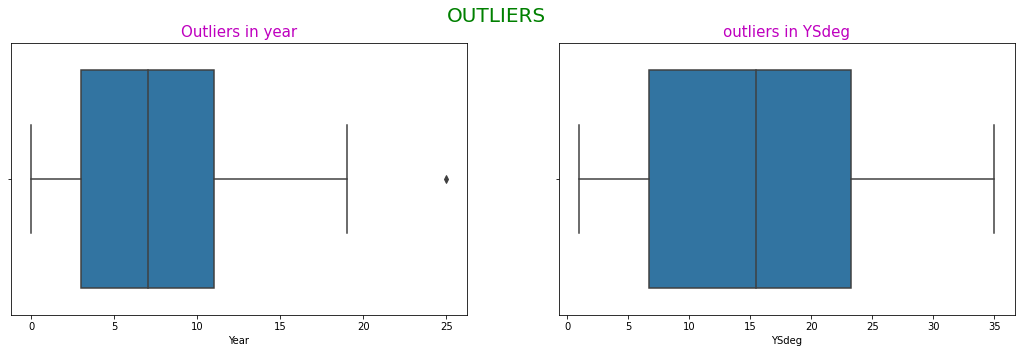

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot('Year',data=df)
plt.title("Outliers in year",color='m',size=15)
plt.subplot(1,2,2)
sns.boxplot('YSdeg',data=df)
plt.title("outliers in YSdeg",color='m',size=15)
plt.suptitle("OUTLIERS",color='g',size=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Outliers in Salary')

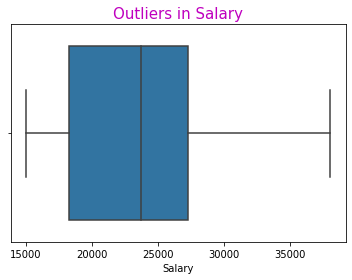

In [ ]:
sns.boxplot('Salary',data=df)
plt.title("Outliers in Salary",color='m',size=15)

There only outliers only in feature YEAR.

# IQR based outlier filtering

In [ ]:
percentile25_year = df['Year'].quantile(0.25)
percentile75_year = df['Year'].quantile(0.75)
iqr_year=percentile75_year - percentile25_year
print("IQR for Year is ",iqr_year)
print("25th Percentile of the Year data is :",percentile25_year)
print("75th Percentile of the year data is :",percentile75_year)

IQR for Year is  8.0
25th Percentile of the Year data is : 3.0
75th Percentile of the year data is : 11.0


In [ ]:
upper_limit_year = percentile75_year + 1.5 * iqr_year
lower_limit_year = percentile25_year - 1.5 * iqr_year
print("Highest allowed year is :",upper_limit_year)
print("Lowest allowed year is :",lower_limit_year)

Highest allowed year is : 23.0
Lowest allowed year is : -9.0


In [ ]:
df[(df['Year'] > upper_limit_year) | (df['Year'] < lower_limit_year)]

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350


# Capping

In [ ]:
df['Year'] = np.where(df['Year']>upper_limit_year,upper_limit_year,df['Year'])

In [ ]:
df[(df['Year'] > upper_limit_year) | (df['Year'] < lower_limit_year)]

,Sex,Rank,Year,Degree,YSdeg,Salary


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Outliers in Year')

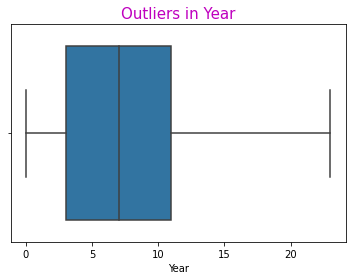

In [ ]:
sns.boxplot('Year',data=df)
plt.title("Outliers in Year",color='m',size=15)

# EDA

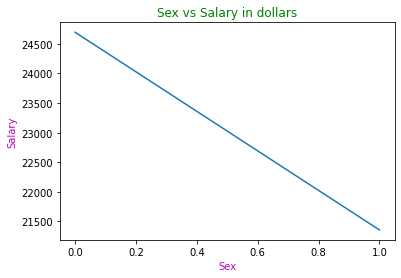

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary in dollars',color='g')
plt.xlabel('Sex',color='m')
plt.ylabel('Salary',color='m')
plt.show()
df[['Sex','Salary']].corr()

There is -ve relation ship btw sex and salary.

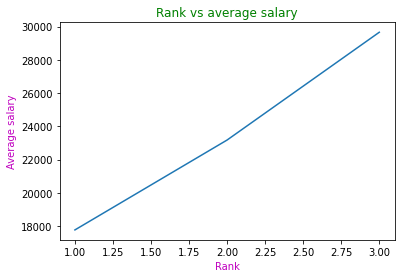

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title("Rank vs average salary",color='g')
plt.xlabel("Rank",color='m')
plt.ylabel("Average salary",color='m')
plt.show()
df[['Rank','Salary']].corr()

1) There is a linear relationship between Rank and salary 2) As Rank increases, salary increases which is in-line with our General knowledge 3) No transformation required

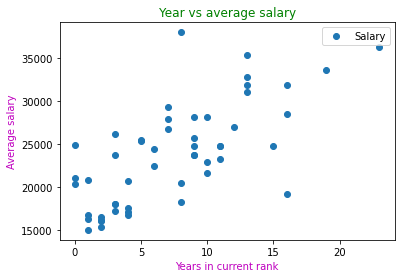

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


In [ ]:
df.plot(x='Year',y='Salary',style='o')
plt.title("Year vs average salary",color='g')
plt.xlabel("Years in current rank",color='m')
plt.ylabel("Average salary",color='m')
plt.show()
df[['Year','Salary']].corr()

1) There is a linear relationship between Years and salary 2) As Years increases, salary increases which is in-line with our General knowledge 3) No transformation required

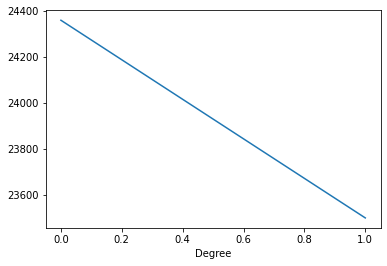

In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
plt.show()

There is negative linear relationship between degree and salary. No transformation required.

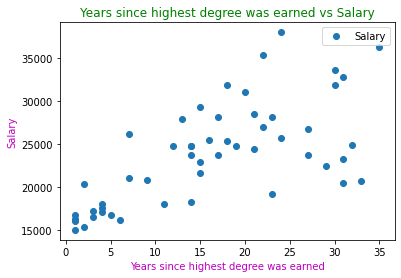

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg',y='Salary',style='o')
plt.title("Years since highest degree was earned vs Salary",color='g')
plt.xlabel("Years since highest degree was earned",color='m')
plt.ylabel("Salary",color='m')
plt.show()
df[['YSdeg','Salary']].corr()

There is a linear relationship between YSdeg and salary => No transformation

In [ ]:
X = df[['Sex','Rank','Year','Degree','YSdeg']].values
y = df['Salary'].values

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
line_regg = LinearRegression()
line_regg.fit(X,y)

LinearRegression()

In [ ]:
y_pred = line_regg.predict(X)

In [ ]:
df2 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,36350,33648.763496
1,35350,30359.224320
2,28200,28783.486867
3,26775,28056.374939
4,33696,33518.850161


#  Find the linear regression equation for this data using columns 1-5 to column 6.

In [ ]:
c = line_regg.intercept_
print("The intercept value is :", c)

The intercept value is : 11317.792423353952


In [ ]:
m = line_regg.coef_
print("The value of slope (m) is :",m)

The value of slope (m) is : [ 1209.16166705  5529.29349602   485.18624613 -1209.9380784
  -120.17871422]


In [ ]:
print("Linearregg eqn is: Predicted salary = Sex *",m[0],"+ Rank *",m[1],"+ Year *",m[2],"+ Degree *",m[3],"+ YSdeg *",m[4],"+",c)

Linearregg eqn is: Predicted salary = Sex * 1209.16166705061 + Rank * 5529.293496022554 + Year * 485.18624613173324 + Degree * -1209.9380783978274 + YSdeg * -120.1787142231019 + 11317.792423353952


equation = m1x1 + m2x2 + m3x3 + m4x4 + c

# Find the selection of columns with the best R2 score.

In [ ]:
from sklearn import metrics
print('R2- score of the model:', metrics.r2_score(y,y_pred))

R2- score of the model: 0.8521980792958704


In [ ]:
X1=df[['Sex']]
X2=df[['Rank']]
X3=df[['Year']]
X4=df[['YSdeg']]
Y=df['Salary']

In [ ]:
model1=line_regg.fit(X1,Y)
print('Score1: ',line_regg.score(X1,Y))
model2=line_regg.fit(X2,Y)
print('Score2: ',line_regg.score(X2,Y))
model3=line_regg.fit(X3,Y)
print('Score3: ',line_regg.score(X3,Y))
model4=line_regg.fit(X4,Y)
print('Score4: ',line_regg.score(X4,Y))

Score1:  0.06389892583288004
Score2:  0.7525360539274633
Score3:  0.4909952772347481
Score4:  0.45542813458360276


SCore2 i.e, feature 2 (Rank) has best score

# Report whether sex is a factor in salary.

sex on its own has a score very close to zero (0.063898925832880038), By this we can conclude that, There is no salary discrimination by Sex.